In [1]:
#Import some things
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits
from astropy.table import Table,join
from astropy.coordinates import SkyCoord
from astropy.io import ascii as asciitable

In [28]:
grid=Table.read('LeslieYrec1WriteOutStates.txt', format='ascii', delimiter=' ')

In [29]:
grid

File,phase,mass,feh,logLLsun,logRRsun,Age,logTeff,logg,Mccore,Mcenv,ClogRHO,ClogT,CX,CY
str30,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
m050fehm000_Test_HPG_base_ZAHB,zams,0.5,5.72205e-06,-1.44568,-0.348462,1.98185,3.57414,4.83398,0.0261917,0.164382,1.83884,6.93399,0.724645,0.256742
m050fehm000_Test_HPG_base_ZAHB,tams,0.5,0.000125885,-0.786606,-0.136705,136.64,3.63302,4.41046,0.0,0.0979154,3.28797,7.2236,0.000934969,0.982065
m050fehm050_Test_HPG_base_ZAHB,zams,0.5,-0.500003,-1.30584,-0.343201,1.76403,3.60646,4.82345,0.037865,0.103049,1.90125,6.94577,0.737267,0.255801
m050fehm050_Test_HPG_base_ZAHB,tams,0.5,-0.499991,-0.575271,-0.127285,95.3608,3.68115,4.39162,0.0,0.0609592,3.33865,7.25384,0.000930696,0.993596
m050fehm100_Test_HPG_base_ZAHB,zams,0.5,-1.00002,-1.21041,-0.344887,1.44842,3.63117,4.82683,0.0465033,0.076329,1.93015,6.9563,0.742434,0.254537
m050fehm100_Test_HPG_base_ZAHB,tams,0.5,-1.00002,-0.416409,-0.136153,75.4504,3.7253,4.40936,0.0,0.0380272,3.37664,7.28149,0.000919191,0.99734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m800fehm050_Test_HPG_base_TAMS,tams,8.0,-0.500012,3.87508,0.808231,0.0375197,4.32598,3.72473,0.937662,0.0,1.66008,7.7132,0.000976812,0.99355
m800fehm050_Test_HPG_base_ZAHB,tams,8.0,-0.500012,3.8845,0.793461,0.0375448,4.33572,3.75427,0.0,0.0,2.08562,7.76456,0.0,0.994527


In [30]:
zahb=np.where(grid['phase'] == 'zahb')
zams=np.where(grid['phase']  == 'zams')
tams=np.where(grid['phase']  == 'tams')

In [31]:
zahbsolar=np.where((grid['phase'] == 'zahb') & (grid['feh']>-0.1) & (grid['feh']<0.1))
zamssolar=np.where((grid['phase']  == 'zams') & (grid['feh']>-0.1) & (grid['feh']<0.1))
tamssolar=np.where((grid['phase']  == 'tams') & (grid['feh']>-0.1) & (grid['feh']<0.1))

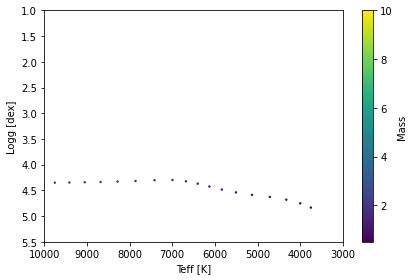

In [32]:
#plot stuff
plt.figure()
plt.scatter(10**grid['logTeff'][zamssolar], grid['logg'][zamssolar],c=grid['mass'][zamssolar],vmin=0.5,vmax=10,s=2)
plt.xlabel('Teff [K]')
plt.ylabel('Logg [dex]')
#plt.errorbar(5500, 1.5, xerr=np.median(data['Teff_err']),
#             yerr=np.median(data['Logg_err']), color='k')
plt.colorbar(label='Mass')
plt.xlim(10000,3000)

plt.ylim(5.5,1.0)
plt.tight_layout()        # auto-adjust boundaries after you have added everything
plt.draw()                # make sure it updates (possibly unnecessary)
plt.savefig('LeslieHRD.jpg', bbox_inches='tight', dpi=600)

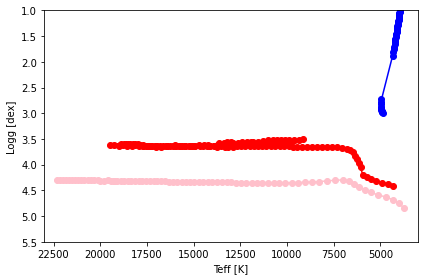

In [39]:
#plot stuff
plt.figure()
plt.plot(10**grid['logTeff'][zamssolar], grid['logg'][zamssolar],c='pink', marker='o', linestyle='-')
plt.plot(10**grid['logTeff'][tamssolar], grid['logg'][tamssolar],c='red', marker='o', linestyle='-')
plt.plot(10**grid['logTeff'][zahbsolar], grid['logg'][zahbsolar],c='blue', marker='o', linestyle='-')
plt.xlabel('Teff [K]')
plt.ylabel('Logg [dex]')
#plt.errorbar(5500, 1.5, xerr=np.median(data['Teff_err']),
#             yerr=np.median(data['Logg_err']), color='k')
#plt.colorbar(label='Mass')
plt.xlim(23000,3000)

plt.ylim(5.5,1.0)
plt.tight_layout()        # auto-adjust boundaries after you have added everything
plt.draw()                # make sure it updates (possibly unnecessary)
plt.savefig('LeslieKiel.jpg', bbox_inches='tight', dpi=600)

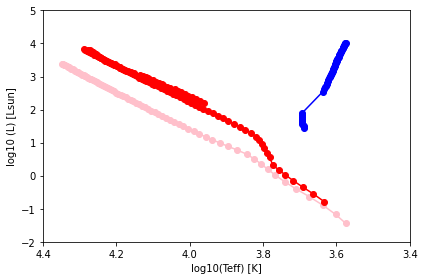

In [45]:
#plot stuff
plt.figure()
plt.plot(grid['logTeff'][zamssolar], grid['logLLsun'][zamssolar],c='pink', marker='o', linestyle='-')
plt.plot(grid['logTeff'][tamssolar], grid['logLLsun'][tamssolar],c='red', marker='o', linestyle='-')
plt.plot(grid['logTeff'][zahbsolar], grid['logLLsun'][zahbsolar],c='blue', marker='o', linestyle='-')
plt.xlabel('log10(Teff) [K]')
plt.ylabel('log10 (L) [Lsun]')
#plt.errorbar(5500, 1.5, xerr=np.median(data['Teff_err']),
#             yerr=np.median(data['Logg_err']), color='k')
#plt.colorbar(label='Mass')
plt.xlim(4.4, 3.4)

plt.ylim(-2, 5)
plt.tight_layout()        # auto-adjust boundaries after you have added everything
plt.draw()                # make sure it updates (possibly unnecessary)
plt.savefig('LeslieHRD.jpg', bbox_inches='tight', dpi=600)

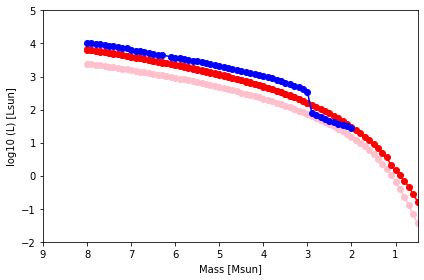

In [47]:
#plot stuff
plt.figure()
plt.plot(grid['mass'][zamssolar], grid['logLLsun'][zamssolar],c='pink', marker='o', linestyle='-')
plt.plot(grid['mass'][tamssolar], grid['logLLsun'][tamssolar],c='red', marker='o', linestyle='-')
plt.plot(grid['mass'][zahbsolar], grid['logLLsun'][zahbsolar],c='blue', marker='o', linestyle='-')
plt.xlabel('Mass [Msun]')
plt.ylabel('log10 (L) [Lsun]')
#plt.errorbar(5500, 1.5, xerr=np.median(data['Teff_err']),
#             yerr=np.median(data['Logg_err']), color='k')
#plt.colorbar(label='Mass')
plt.xlim(9,0.5)

plt.ylim(-2, 5)
plt.tight_layout()        # auto-adjust boundaries after you have added everything
plt.draw()                # make sure it updates (possibly unnecessary)
plt.savefig('LeslieMassL.jpg', bbox_inches='tight', dpi=600)